In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/Users/sunhangzi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Opinion (professional institutions)

In [2]:
chi_concept = pd.read_csv('chi_concept_stock_opinion.csv')
ele_car = pd.read_csv('ele_car_opinion.csv')
semi_conductor = pd.read_csv('semi_conductor_opinion.csv')
small_mkt = pd.read_csv('small_mkt_opinion.csv')
tech = pd.read_csv('tech_opinion.csv')

In [3]:
chi_concept = chi_concept[(chi_concept['Stock']=='BABA')|(chi_concept['Stock']=='NIO')]
ele_car = ele_car[(ele_car['Stock']=='TSLA')|(ele_car['Stock']=='LCID')]
semi_conductor = semi_conductor[semi_conductor['Stock']=='AMD']
small_mkt = small_mkt[small_mkt['Stock']=='AMC']
tech = tech[(tech['Stock']=='META')|(tech['Stock']=='AMZN')|(tech['Stock']=='MSFT')|
                      (tech['Stock']=='AAPL')]

In [4]:
all_opinion = pd.concat([chi_concept, ele_car, semi_conductor, small_mkt, tech])
all_opinion.head(5)

Stock                                              Title             Date  \
0  BABA  Tencent Stock Has More Than Doubled; Is it Tim...   - Feb 09, 2023   
1  BABA     Alibaba Set to Gain as China Unfreezes Economy   - Jan 31, 2023   
2  BABA       3 Retail Stocks Ringing the Register in 2023   - Jan 26, 2023   
3  BABA  Alibaba Stock Surges on Improving Outlook for ...   - Jan 17, 2023   
4  BABA      Is the Great Alibaba Recovery About to Begin?   - Jan 13, 2023   

                                                Link  \
0  https://www.investing.com/analysis/tencent-sto...   
1  https://www.investing.com/analysis/alibaba-set...   
2  https://www.investing.com/analysis/3-retail-st...   
3  https://www.investing.com/analysis/alibaba-sto...   
4  https://www.investing.com/analysis/is-the-grea...   

                                             Content  
0  It was only in early November 2022 that China ...  
1  China's reopening has revived its economy but ...  
2  Investors seem to be positioning for a strong ...  
3  E-commerce behemoth Alibaba Group Holdings (NY...  
4  Alibaba shares are up 100% from their lows. Ta...

### The number of each stock

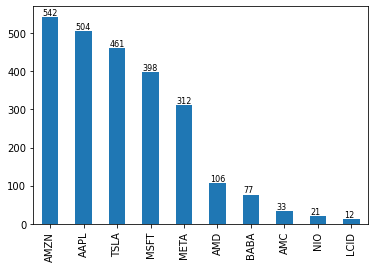

In [5]:
# calculate the number of rows for each stock name - opinion
stock_counts = all_opinion['Stock'].value_counts()

# create a bar plot of the results
ax = stock_counts.plot(kind='bar')
for i, v in enumerate(stock_counts):
    ax.text(i-0.23, v + 5, str(v), color='black', fontsize=8)

plt.show()

### Word cloud

In [6]:
pip install -U emoji

Requirement already up-to-date: emoji in /Users/sunhangzi/opt/anaconda3/lib/python3.8/site-packages (2.2.0)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import emoji

# define a function to convert emoji to words
def convert_emoji_to_word(comment):
    return emoji.demojize(comment).replace(":"," ")

# apply the function to the 'body' column of the DataFrame
all_opinion['Content'] = all_opinion['Content'].apply(convert_emoji_to_word)
all_opinion['Content']

0       It was only in early November 2022 that China ...
1       China's reopening has revived its economy but ...
2       Investors seem to be positioning for a strong ...
3       E-commerce behemoth Alibaba Group Holdings (NY...
4       Alibaba shares are up 100% from their lows. Ta...
                              ...                        
2096    If you invest in closed-end funds (CEFs), you’...
2097    Wall Street rally in 2021 can be largely attri...
2098    As the new year begins, analysts on Wall Stree...
2099    Apple Inc (NASDAQ AAPL). AAPL will face an inv...
2100    Despite significantly increased adoption, DeFi...
Name: Content, Length: 2466, dtype: object

#### All stocks

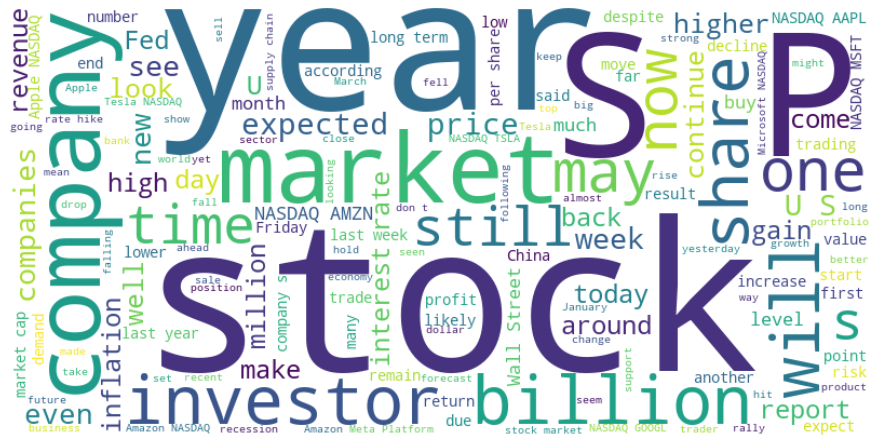

In [8]:
#all comments
from wordcloud import WordCloud, STOPWORDS

converted_comments = all_opinion['Content']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10, max_words=1000).generate(text)
# note: I've set max_words to 1000 to limit the number of words displayed in the cloud

# plot the word cloud using matplotlib
plt.figure(figsize=(12, 6), facecolor=None)  # increasing the width of the figure to create a horizontal plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### China concept

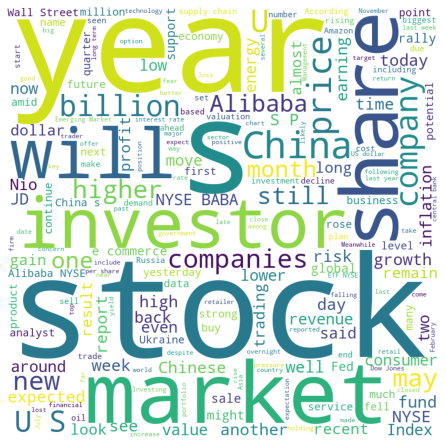

In [9]:
#china concept
converted_comments = all_opinion[(all_opinion['Stock']=='BABA')|(all_opinion['Stock']=='NIO')]['Content']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Electricity car 

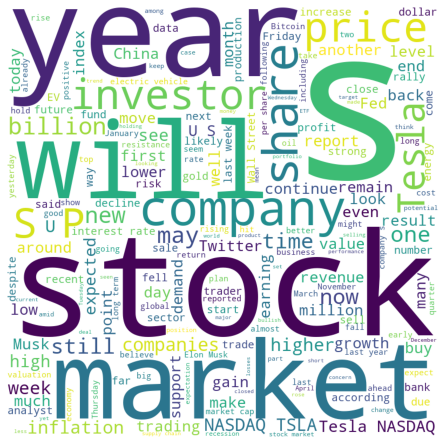

In [10]:
#### Electricity car 

converted_comments = all_opinion[(all_opinion['Stock']=='TSLA')|(all_opinion['Stock']=='LCID')]['Content']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Technology 

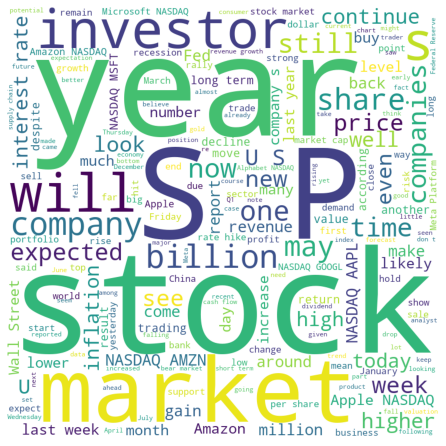

In [11]:
#### Technology 

converted_comments = all_opinion[(all_opinion['Stock']=='META')|(all_opinion['Stock']=='AMZN')|(all_opinion['Stock']=='MSFT')|
                      (all_opinion['Stock']=='AAPL')]['Content']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Small market value

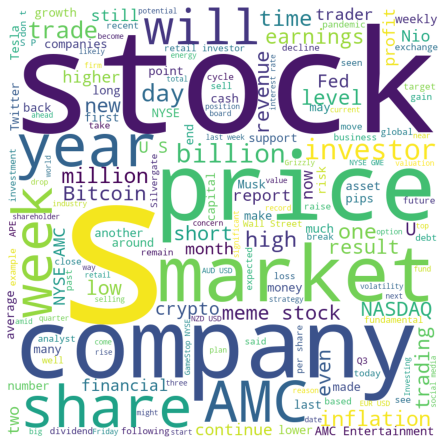

In [12]:
#### Small market value

converted_comments = all_opinion[all_opinion['Stock']=='AMC']['Content']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Simi-conductor

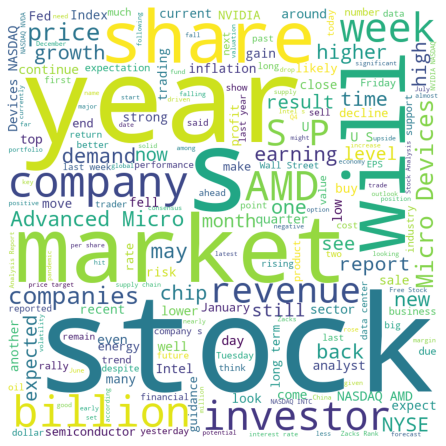

In [13]:
#### Simi-conductor

converted_comments = all_opinion[all_opinion['Stock']=='AMD']['Content']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Comments (individual investors)

In [16]:
TSLA_Forums = pd.read_csv('TSLA_Forums.csv')[['time','comment']].dropna()
TSLA_Forums['stock'] = 'TSLA'

LCID_Forums = pd.read_csv('LCID_Forums.csv')[['time','comment']].dropna()
LCID_Forums['stock'] = 'LCID'

META_Forums = pd.read_csv('META_Forums.csv')[['time','comment']].dropna()
META_Forums['stock'] = 'META'

AMZN_Forums = pd.read_csv('AMZN_Forums.csv')[['time','comment']].dropna()
AMZN_Forums['stock'] = 'AMZN'

MSFT_Forums = pd.read_csv('MSFT_Forums.csv')[['time','comment']].dropna()
MSFT_Forums['stock'] = 'MSFT'

AAPL_Forums = pd.read_csv('AAPL_Forums.csv')[['time','comment']].dropna()
AAPL_Forums['stock'] = 'AAPL'

BABA_Forums = pd.read_csv('BABA_Forums.csv')[['time','comment']].dropna()
BABA_Forums['stock'] = 'BABA'

NIO_Forums = pd.read_csv('NIO_Forums.csv')
NIO_Forums = NIO_Forums.rename(columns={'Date': 'time', 'Comment': 'comment'})[['time','comment']].dropna()
NIO_Forums['stock'] = 'NIO'

AMD_Forums = pd.read_csv('semi_conductor_forum.csv')
AMD_Forums = AMD_Forums[AMD_Forums['Stock']=='AMD'][['Comment','Date']]
AMD_Forums = AMD_Forums.rename(columns={'Date': 'time', 'Comment': 'comment'})[['time','comment']].dropna()
AMD_Forums['stock'] = 'AMD'

AMC_Forums = pd.read_csv('AMC_Forums.csv')[['time','comment']].dropna()
AMC_Forums['stock'] = 'AMC'


In [17]:
all_Forums = pd.concat([TSLA_Forums, LCID_Forums, META_Forums, AMZN_Forums, MSFT_Forums,
                       AAPL_Forums, AMC_Forums, BABA_Forums,
                       NIO_Forums, AMD_Forums])
all_Forums.head(5)

time                                            comment stock
0   1 hour ago     hello all dears i,m new here PELLESE help me🥲🥲  TSLA
1  3 hours ago  I was in the mood to sell but the price has go...  TSLA
2  4 hours ago                   will the price drop a bit today?  TSLA
3  5 hours ago  This stock is on its way back to 700+ per shar...  TSLA
4  7 hours ago  Immediate target 235 then 240 to 250. Told sho...  TSLA

### The number of each stock

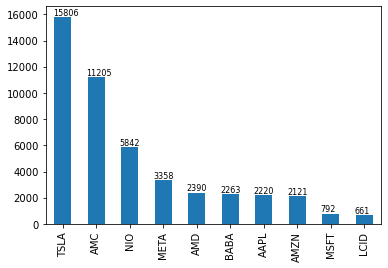

In [18]:
# calculate the number of rows for each stock name - comments
stock_counts = all_Forums['stock'].value_counts()

# create a bar plot of the results
ax = stock_counts.plot(kind='bar')
for i, v in enumerate(stock_counts):
    ax.text(i-0.3, v + 150, str(v), color='black', fontsize=8)

plt.show()

### Word cloud

In [19]:
# apply the function to the 'body' column of the DataFrame
all_Forums['comment'] = all_Forums['comment'].apply(convert_emoji_to_word)
all_Forums['comment']

0       hello all dears i,m new here PELLESE help me s...
1       I was in the mood to sell but the price has go...
2                        will the price drop a bit today?
3       This stock is on its way back to 700+ per shar...
4       Immediate target 235 then 240 to 250. Told sho...
                              ...                        
2385    Have A Healthy good new Year my Friends, Money...
2386    People don't care right now, because &quot;New...
2387                                150 next week...hoply
2388                                  why so strong today
2389                                         Disappointed
Name: comment, Length: 46658, dtype: object

#### All stocks

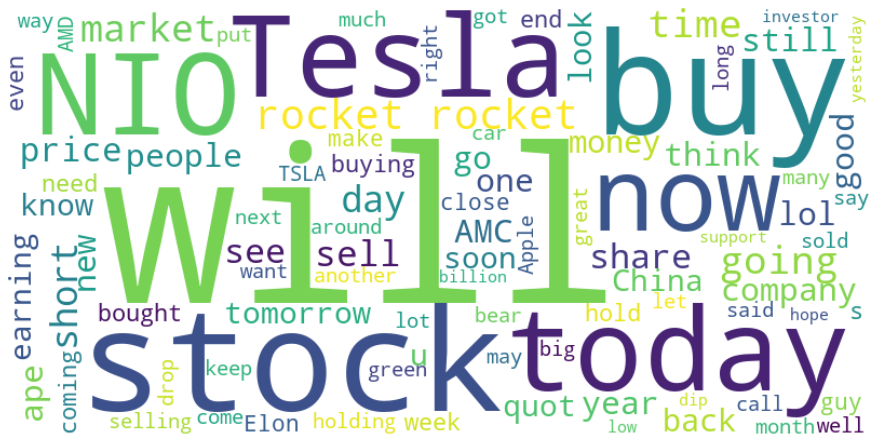

In [20]:
#all comments
converted_comments = all_Forums['comment']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10, max_words=1000).generate(text)
# note: I've set max_words to 1000 to limit the number of words displayed in the cloud

# plot the word cloud using matplotlib
plt.figure(figsize=(12, 6), facecolor=None)  # increasing the width of the figure to create a horizontal plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### China concept

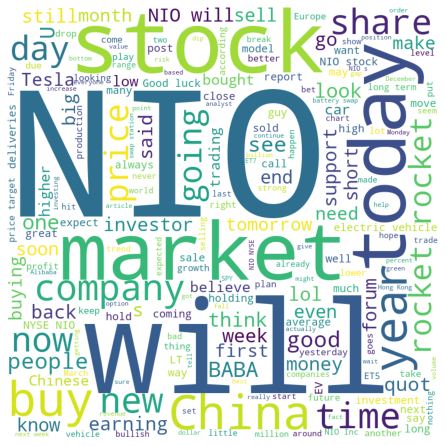

In [21]:
#china concept
converted_comments = all_Forums[(all_Forums['stock']=='BABA')|(all_Forums['stock']=='NIO')]['comment']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Electricity car 

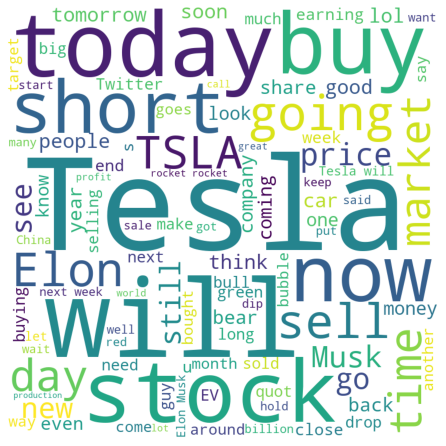

In [22]:
#### Electricity car 

converted_comments = all_Forums[(all_Forums['stock']=='TSLA')|(all_Forums['stock']=='LCID')]['comment']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Technology 

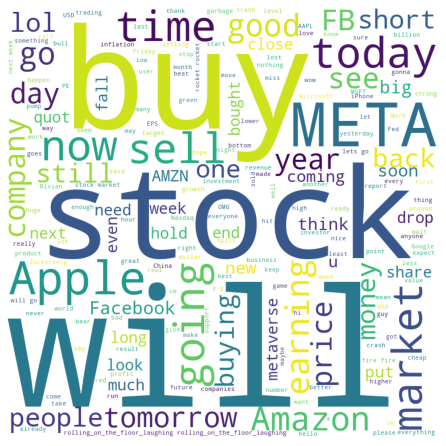

In [23]:
#### Technology 

converted_comments = all_Forums[(all_Forums['stock']=='META')|(all_Forums['stock']=='AMZN')|(all_Forums['stock']=='MSFT')|
                      (all_Forums['stock']=='AAPL')]['comment']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Small market value

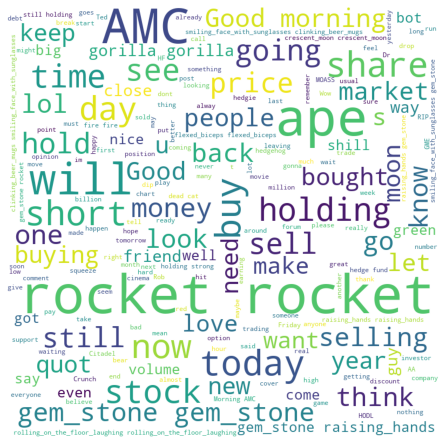

In [24]:
#### Small market value

converted_comments = all_Forums[all_Forums['stock']=='AMC']['comment']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Simi-conductor

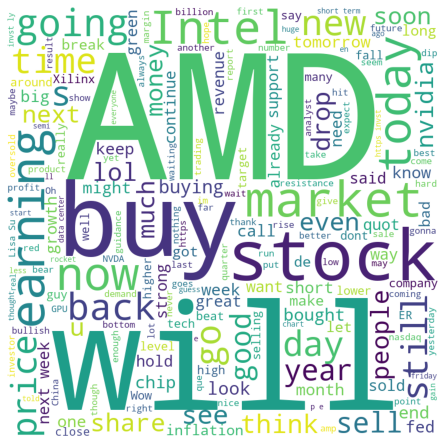

In [25]:
#### Simi-conductor

converted_comments = all_Forums[all_Forums['stock']=='AMD']['comment']
text = " ".join(converted_comments)

# create a WordCloud object and set the parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)

# plot the word cloud using matplotlib
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Put the number of comments and the number of opinions together

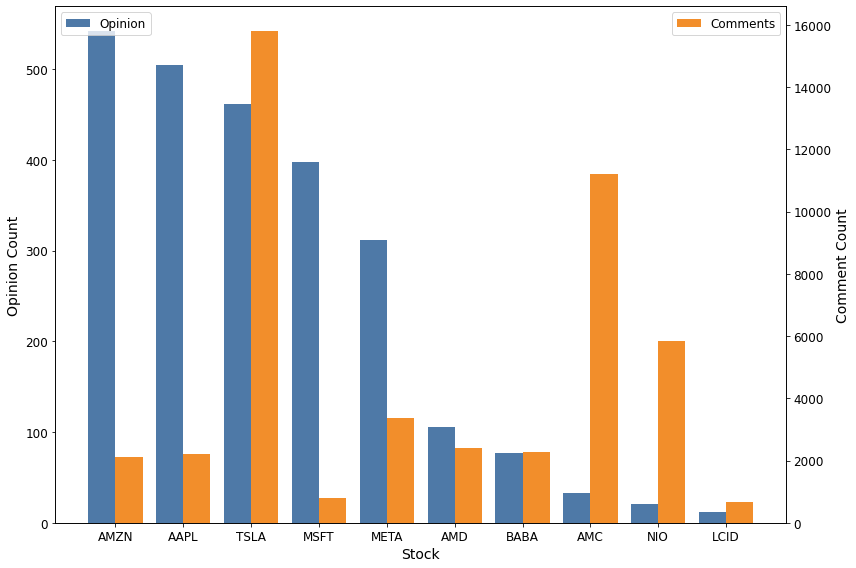

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# calculate the number of rows for each stock name - opinion
stock_counts_opinion = all_opinion['Stock'].value_counts()

# calculate the number of rows for each stock name - comments
stock_counts_comments = all_Forums['stock'].value_counts().reindex(stock_counts_opinion.index)

# create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# set the width of each bar
width = 0.4

# plot the opinion bar chart with the first y-axis
x = np.arange(len(stock_counts_opinion))
ax.bar(x - width/2, stock_counts_opinion.values, width=width, color='#4e79a7', label='Opinion')
ax.set_xticks(x)
ax.set_xticklabels(stock_counts_opinion.index)
ax.set_xlabel('Stock', fontsize=14)
ax.set_ylabel('Opinion Count', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# plot the comments bar chart with the second y-axis
ax2 = ax.twinx()
ax2.bar(x + width/2, stock_counts_comments.values, width=width, color='#f28e2b', label='Comments')
ax2.set_ylabel('Comment Count', fontsize=14)
ax2.tick_params(axis='y')
#ax2.spines['right'].set_color('#f28e2b')
#ax2.spines['left'].set_color('#4e79a7')
#ax2.yaxis.label.set_color('#f28e2b')
ax2.tick_params(axis='both', labelsize=12)

# add a legend
ax.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# adjust the layout
fig.tight_layout()

# show the plot
plt.show()


## Sentiment Analysis Result

In [27]:
#comment
#1-comment 2-opinion
sentiment = pd.read_csv('df_all_predict_0422.csv')
unique_stocks=['AAPL','AMC','BABA','LCID','META','MSFT','NIO','TSLA','AMD','AMZN']
sentiment = sentiment[sentiment['stock'].isin(unique_stocks)]
sentiment.loc[sentiment['label'] == 2, 'label'] = -1
sentiment.head(5)

stock        date                                               text  \
0  BABA  2023-01-31  China's reopening has revived its economy but ...   
1  BABA  2023-01-26  Investors seem to be positioning for a strong ...   
2  BABA  2023-01-17  E-commerce behemoth Alibaba Group Holdings (NY...   
3  BABA  2023-01-13  Alibaba shares are up 100% from their lows. Ta...   
4  BABA  2023-01-13  The continued easing of US price pressures has...   

   category  label  
0         2    1.0  
1         2    1.0  
2         2    1.0  
3         2    1.0  
4         2    0.0

In [28]:
sentiment_avg = sentiment.groupby(['stock', 'category', 'date'])['label'].mean().reset_index()
sentiment_avg

stock  category        date     label
0     AAPL         1  2022-01-01  0.000000
1     AAPL         1  2022-01-02  1.000000
2     AAPL         1  2022-01-04 -0.166667
3     AAPL         1  2022-01-05  0.142857
4     AAPL         1  2022-01-06 -0.500000
...    ...       ...         ...       ...
3948  TSLA         2   2023/1/18 -0.500000
3949  TSLA         2   2023/1/23  1.000000
3950  TSLA         2   2023/1/26  1.000000
3951  TSLA         2   2023/1/30  1.000000
3952  TSLA         2   2023/2/10  1.000000

[3953 rows x 4 columns]

In [29]:
#statistics for each stock
summary_sentiment = pd.DataFrame(index=range(10), columns = ['stock', 'comment_avg', 'comment_std', 'opinion_avg', 'opinion_std'])
n = 0
for i in unique_stocks:
    comment_avg = sentiment[(sentiment['stock']==i) & (sentiment['category']==1)]['label'].mean()
    opinion_avg = sentiment[(sentiment['stock']==i) & (sentiment['category']==2)]['label'].mean()
    comment_sd = sentiment[(sentiment['stock']==i) & (sentiment['category']==1)]['label'].std()
    opinion_sd = sentiment[(sentiment['stock']==i) & (sentiment['category']==2)]['label'].std()
    summary_sentiment.loc[n, 'stock'] = i
    summary_sentiment.loc[n, 'comment_avg'] = round(comment_avg,2)
    summary_sentiment.loc[n, 'comment_std'] = round(comment_sd,2)
    summary_sentiment.loc[n, 'opinion_avg'] = round(opinion_avg,2)
    summary_sentiment.loc[n, 'opinion_std'] = round(opinion_sd,2)
    n = n+1
    
summary_sentiment

stock comment_avg comment_std opinion_avg opinion_std
0  AAPL       -0.06         0.8        0.07        0.72
1   AMC       -0.05        0.81       -0.18        0.68
2  BABA        0.02        0.83        0.05        0.81
3  LCID        0.04        0.83        0.08        0.79
4  META        -0.1        0.85       -0.06        0.74
5  MSFT        0.09        0.85        0.11        0.73
6   NIO        0.17        0.83         0.1        0.77
7  TSLA       -0.01        0.86        0.03        0.75
8   AMD        0.08        0.85        0.03        0.82
9  AMZN        0.01        0.85        0.04        0.74

In [66]:
#summary_sentiment.to_csv('summary_sentiment.csv', index=False)